# **Project Name**    - **Mobile Price Range Prediction**



# **Project Summary -**

*Now a days, a cellphone is an essential accessory of a
person. It is the fastest evolving and moving product in the
technology market space. New mobiles with updated versions
and new features are introduced into the market at a rapid pace.
Thousands of mobiles are sold each day. In such a fast-paced
and volatile market, a mobile company needs to set optimal
prices to complete with its rivals.This kind of prediction will help companies estimate price of mobiles to give tough competion to other mobile manufacturer.Also it will be usefull for Consumers to verify that they are paying best price for a mobile.*


*In this project, we are going to explore and analyze a dataset which contains specifications of two thousand mobile phones and try to predict optimum price ranges for a list of mobile phones in the market.During the purchase of mobile phones, various features like memory, display, battery, camera, etc., are considered. People fail to make correct decisions, due to the non-availability of necessary resources to cross-validate the price. To address this issue, a machine learning model is developed using the data related to the key features of the mobile phone.*

# **Problem Statement**


**BUSINESS PROBLEM OVERVIEW**


In the competitive mobile phone market companies want to understand sales data of mobile phones and factors which drive the prices. The objective is to find out some relation between features of a mobile phone e.g. - RAM Internal Memory, etc) and its selling price in this problem, we do not have to predict the actual price but a price range indicating how high the price is ?


**AIM**

*In this Project,On the basis of the mobile Specification like Battery power, 3G enabled , wifi ,Bluetooth, Ram etc we are predicting Price range of the mobile*

# ***Let's Begin !***

*First of all, import all required libraries like pandas, matplotlib, etc. These libraries are used to load, preprocess and visualize the dataset.*

*Then load the training and testing dataset using the read_csv function of the pandas module and store into the separate variable train and test.*

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

C:\Users\ashut\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Dataset Loading

In [2]:
df_train=pd.read_csv('train.csv')


### Dataset First View

In [3]:
# Dataset First Look
df_train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


### Dataset Information 

#### battery_power:  Total energy a battery can store in one time measured in mAh.
#### blue: Has Bluetooth or not.
#### clock_speed: speed at which microprocessor executes instructions
#### dual_sim: Has dual Sim Support or not?
#### fc: Front Camera mega pixels
#### four_g: Has Four_g or Not.
#### int_memory: Internal Memory in Gigabytes
#### m_dep: Mobile Depth in cm
#### mobile_wt: Weight of mobile phone
#### n_cores: Number of cores of processor
#### pc: Primary Camera mega pixels
#### px_height: Pixel Resolution Height
#### px_width: Pixel Resolution Width
#### ram: Random Access Memory in Megabytes
#### sc_h: Screen Height of mobile in cm
#### sc_w: Screen width of mobile in cm
#### talk_time: longest time that a single battery charge will last when you are
#### three_g: Has 3G or not
#### touch_screen: Has touch screen or not
#### wifi: Has wifi or not
#### price_range: This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).



















### Dataset Rows & Columns count

In [4]:
# Dataset Rows & Columns count
df_train.shape

(2000, 21)

### Dataset Information

In [5]:
# Dataset Info
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

#### Duplicate Values

In [6]:
# Dataset Duplicate Value Count
len(df_train[df_train.duplicated()])

0

#### Missing Values/Null Values

In [7]:
# Missing Values/Null Values Count
print(df_train.isnull().sum())

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64


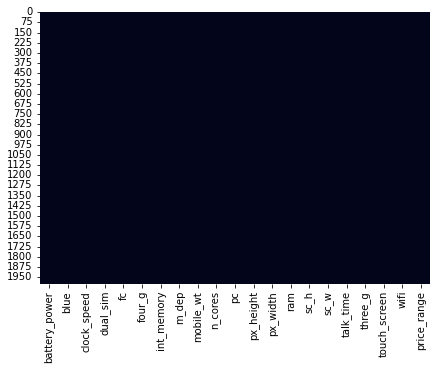

In [8]:
# Visualizing the missing values
# Checking Null Value by plotting Heatmap
plt.figure(figsize=(7,5))
sns.heatmap(df_train.isnull(), cbar=False)
plt.show()

### What did you know about your dataset?

*1.The given dataset from competitive mobile market companies, and we do not have to predict the actual price but a price range indicating how high the price is.*

*2.Mobile phones come in all sorts of prices, features, specifications and all. Price estimation and prediction is an important part of consumer strategy. Deciding on the correct price of a product is very important for the market success of a product. A new product that has to be launched, must have the correct price so that consumers find it appropriate to buy the product.*

*3.The above dataset has 2000 rows and 21 columns. There are no mising values and duplicate values in the dataset.*

## ***2. Understanding Your Variables***

In [9]:
# Dataset Columns
df_train.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [10]:
# Dataset Describe
df_train.describe(include='all')

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


### Variables Description 

* **Battery_power** : Total energy a battery can store in one time measured in mAh

* **Blue** : Has bluetooth or not

* **Clock_speed** : speed at which microprocessor executes instructions

* **Dual_sim** : Has dual sim support or not

* **Fc** : Front Camera mega pixels

* **Four_g** : Has 4G or not

* **Int_memory** : Internal Memory in Gigabytes

* **M_dep** : Mobile Depth in cm

* **Mobile_wt** : Weight of mobile phone

* **N_cores** : Number of cores of processor

* **Pc** : Primary Camera mega pixels


* **Px_height** : Pixel Resolution Height

* **Px_width** : Pixel Resolution Width

* **Ram** : Random Access Memory in Mega

* **Touch_screen** : Has touch screen or not

* **Wifi** : Has wifi or not

* **Sc_h** : Screen Height of mobile in cm

* **Sc_w** : Screen Width of mobile in cm

* **Talk_time** : longest time that a single battery charge will last when you are

* **Three_g** : Has 3G or not

* **Wifi** : Has wifi or not

* **Price_range** : This is the target variable with value of 0(low cost),  1 (medium cost),2(high cost) and 3(very high cost).

### Check Unique Values for each variable.

In [11]:
df_train.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

## 3. ***Data Wrangling***

In [12]:
# Write your code to make your dataset analysis ready.

# Create a copy of the current dataset and assigning to df
df=df_train.copy()

# Checking mobile belongs to price range 0
print("No of mobile belongs to price_range 0 is :",len(df[df['price_range']==0]))

# Checking mobile belongs to price range 1
print("No of mobile belongs to price_range 1 is :",len(df[df['price_range']==1]))

# Checking mobile belongs to price range 2
print("No of mobile belongs to price_range 2 is :",len(df[df['price_range']==2]))

# Checking mobile belongs to price range 3
print("No of mobile belongs to price_range 3 is :",len(df[df['price_range']==3]))

No of mobile belongs to price_range 0 is : 500
No of mobile belongs to price_range 1 is : 500
No of mobile belongs to price_range 2 is : 500
No of mobile belongs to price_range 3 is : 500


In [13]:
# show value counts
df['price_range'].value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

In [14]:
# Mobile phones groupby 4g support and not supports
df.groupby('four_g')['price_range'].value_counts().reset_index(name="Count").sort_values(["Count"],ascending=False)

,four_g,price_range,Count
4,1,3,275
5,1,1,262
6,1,0,259
0,0,2,253
7,1,2,247
1,0,0,241
2,0,1,238
3,0,3,225


In [15]:
# Mobile phones groupby 3g support and not supports
df.groupby('three_g')['price_range'].value_counts().reset_index(name="Count").sort_values(["Count"],ascending=False)

,three_g,price_range,Count
4,1,2,387
5,1,3,385
6,1,1,378
7,1,0,373
0,0,0,127
1,0,1,122
2,0,3,115
3,0,2,113


In [16]:
# Mobile phones groupby blue support and not supports
df.groupby('blue')['price_range'].value_counts().reset_index(name="Count").sort_values(["Count"],ascending=False)

,blue,price_range,Count
4,1,3,259
0,0,0,257
1,0,2,257
2,0,1,255
5,1,1,245
6,1,0,243
7,1,2,243
3,0,3,241


In [17]:
# Mobile phones groupby dual sim support and not supports
df.groupby('dual_sim')['price_range'].value_counts().reset_index(name="Count").sort_values(["Count"],ascending=False)

,dual_sim,price_range,Count
4,1,3,265
5,1,1,255
0,0,2,251
1,0,0,250
6,1,0,250
7,1,2,249
2,0,1,245
3,0,3,235


In [18]:
# Mobile phones groupby touch screen support and not supports
df.groupby('touch_screen')['price_range'].value_counts().reset_index(name="Count").sort_values(["Count"],ascending=False)

,touch_screen,price_range,Count
0,0,2,265
4,1,0,262
5,1,1,261
1,0,3,252
6,1,3,248
2,0,1,239
3,0,0,238
7,1,2,235


In [19]:
# Pixels count
df['px_count'] = df['px_width']*df['px_height']

In [20]:
# Mobile phones groupby touch screen support and not supports
df.groupby('touch_screen')['price_range'].value_counts().reset_index(name="Count").sort_values(["Count"],ascending=False)

,touch_screen,price_range,Count
0,0,2,265
4,1,0,262
5,1,1,261
1,0,3,252
6,1,3,248
2,0,1,239
3,0,0,238
7,1,2,235


In [21]:
# show price range with descreasing pixel count values
df.sort_values(["px_count"],ascending=False)[ ['price_range', 'px_count'] ].head(10)

,price_range,px_count
988,3,3886306
1771,2,3847480
1017,3,3744520
1397,0,3720318
894,2,3711360
1615,3,3703024
260,1,3690192
1163,2,3649920
148,2,3642884
305,1,3629598


In [22]:
# Write your code to make your dataset analysis ready.
data_num = df_train[['battery_power',  'clock_speed' , 'fc','int_memory','m_dep', 'mobile_wt','n_cores', 'pc',
                      'px_height','px_width','ram', 'sc_h', 'sc_w', 'talk_time']]

data_cat = df_train[['blue','dual_sim', 'four_g','three_g','touch_screen', 'wifi']]

In [23]:
data_num

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
0,842,2.2,1,7,0.6,188,2,2,20,756,2549,9,7,19
1,1021,0.5,0,53,0.7,136,3,6,905,1988,2631,17,3,7
2,563,0.5,2,41,0.9,145,5,6,1263,1716,2603,11,2,9
3,615,2.5,0,10,0.8,131,6,9,1216,1786,2769,16,8,11
4,1821,1.2,13,44,0.6,141,2,14,1208,1212,1411,8,2,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,0.5,0,2,0.8,106,6,14,1222,1890,668,13,4,19
1996,1965,2.6,0,39,0.2,187,4,3,915,1965,2032,11,10,16
1997,1911,0.9,1,36,0.7,108,8,3,868,1632,3057,9,1,5
1998,1512,0.9,4,46,0.1,145,5,5,336,670,869,18,10,19


In [24]:
data_cat

,blue,dual_sim,four_g,three_g,touch_screen,wifi
0,0,0,0,0,0,1
1,1,1,1,1,1,0
2,1,1,1,1,1,0
3,1,0,0,1,0,0
4,1,0,1,1,1,0
...,...,...,...,...,...,...
1995,1,1,1,1,1,0
1996,1,1,0,1,1,1
1997,0,1,1,1,1,0
1998,0,0,1,1,1,1


### What all manipulations have you done and insights you found?

The dependent variable 4 types of unique variable and all 4 same length of value are their.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64
 


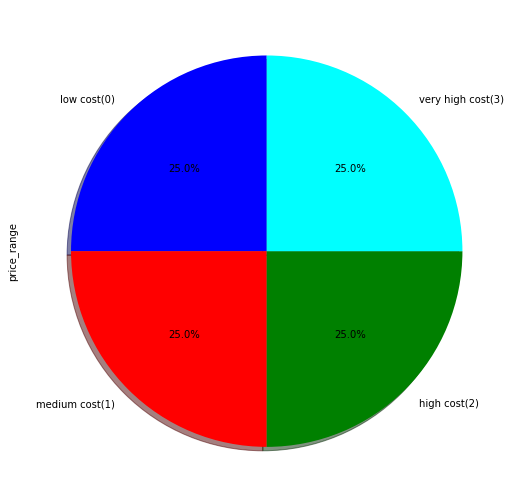

In [25]:
# Chart - 1 visualization code
# Dependent Column Value Counts
print(df_train.price_range.value_counts())
print(" ")
# Dependent Variable Column Visualization
df_train['price_range'].value_counts().plot(kind='pie',
                              figsize=(12,9),
                              autopct="%1.1f%%",
                               startangle=90,
                               shadow=True,
                               labels=["low cost(0)", "medium cost(1)", "high cost(2)", "very high cost(3)"],
                               colors=['blue','red','green','cyan'],
                               explode=[0,0,0,0]
                              )

plt.show()

##### 1. Why did you pick the specific chart?

A pie chart expresses a part-to-whole relationship in your data. It's easy to explain the percentage comparison through area covered in a circle with different colors. Where differenet percentage comparison comes into action pie chart is used frequently. So, I used Pie chart and which helped me to get the percentage comparision of the dependant variable.

##### 2. What is/are the insight(s) found from the chart?

From the above pie chart total 2000 dataset.I got to know that, there are 500 mobile data which are low cost which is 25%, 500 mobile data which are medium cost which is 25%, 500 mobile data which are high cost which is 25% and 500 mobile data which are very high cost which is 25% of the whole mobile data given in the dataset.

In other words we can say that all mobile price range category are equally important and we have to focus on all price range people to maximizes our sell and gain more profit.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Mobile price prediction is depends upon many factor's like processor, ram, internal memory, camera mega pixels as much as these features increase the value of a mobile price is increased.

When Xiaomi MI came into market it provides better value for the money for mobile phones. It gives more features in less price that's why it more populer than other companies. This is the company that bring new premium features in less price like IR Blaster, Finger Print Censors in very low price.

To maximize the sell of mobile we need to bring more features in less prices.

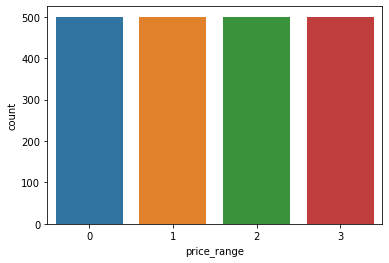

In [26]:

sns.countplot(df_train['price_range'])
plt.show()

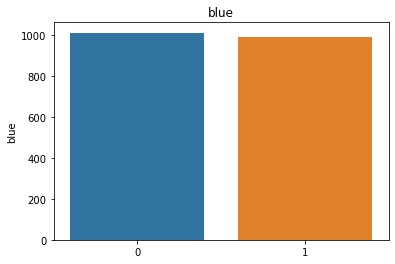

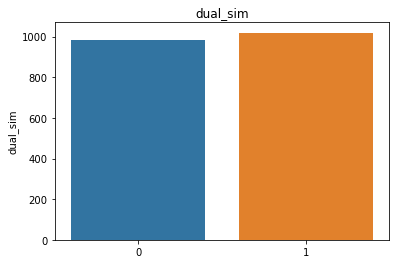

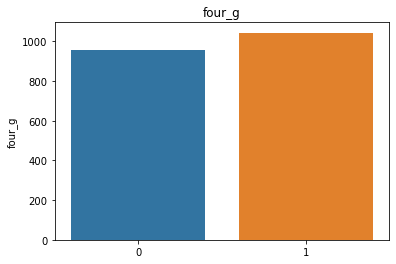

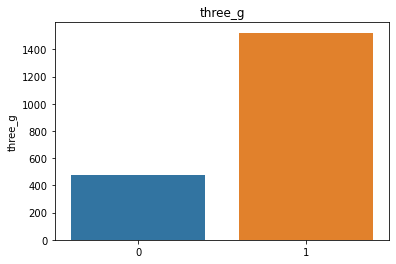

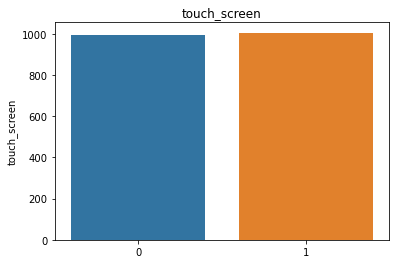

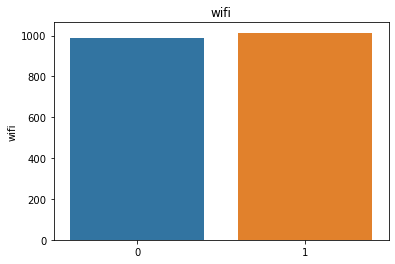

In [27]:
# Chart - 4 visualization codefor i in data_cat.columns:
for i in data_cat.columns:
    sns.barplot(data_cat[i].value_counts().index,data_cat[i].value_counts()).set_title(i)
    plt.show()


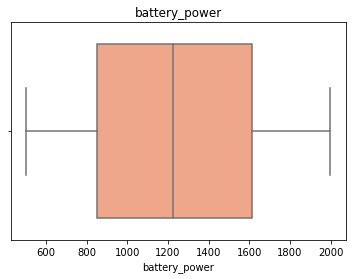

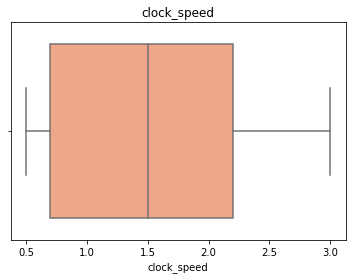

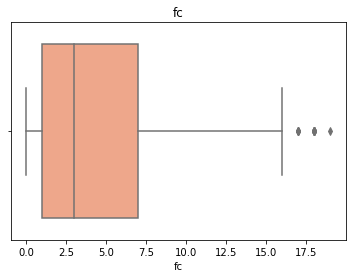

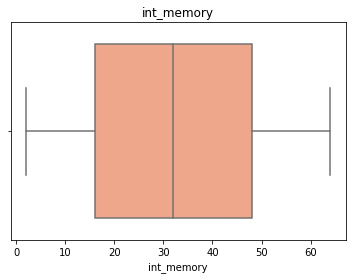

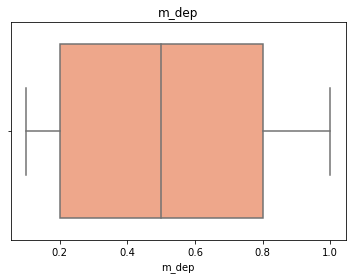

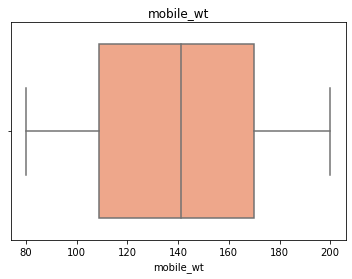

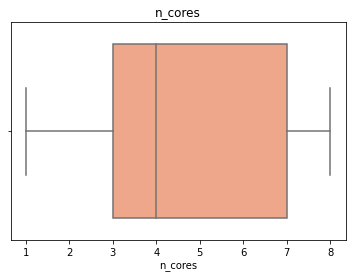

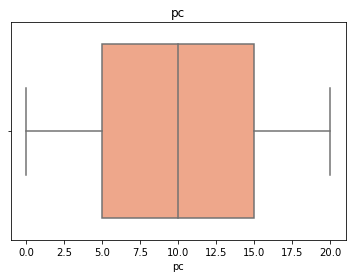

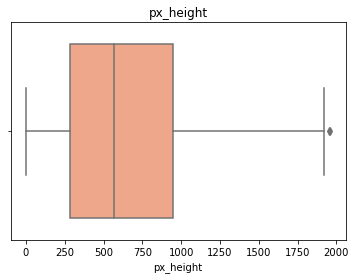

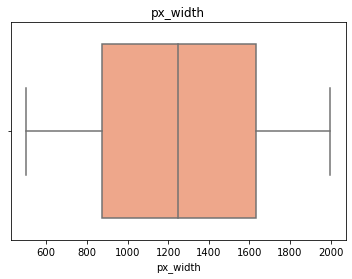

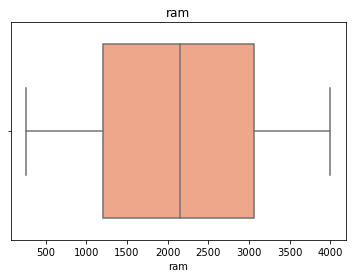

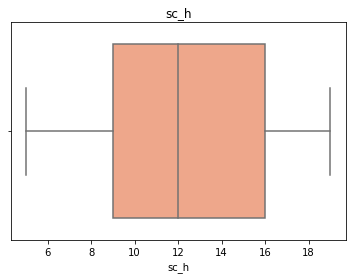

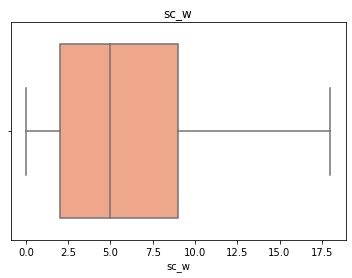

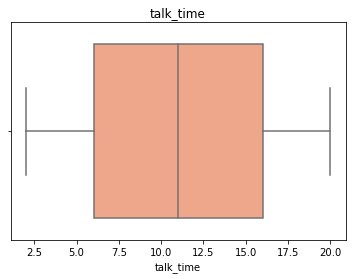

In [28]:
# Chart - 5 visualization code
# dealing with outliers values
for i in data_num.columns:
    sns.boxplot(data_num[i],color='#FFA07A')
    plt.title(i)
    plt.show()

In [29]:
binary_features = [ 'four_g', 'three_g']

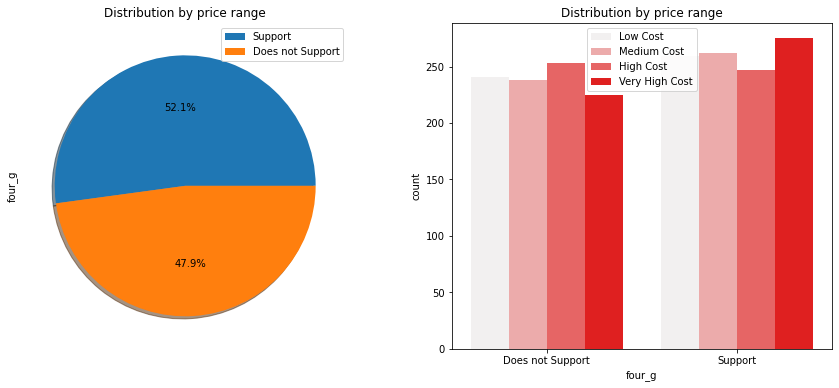

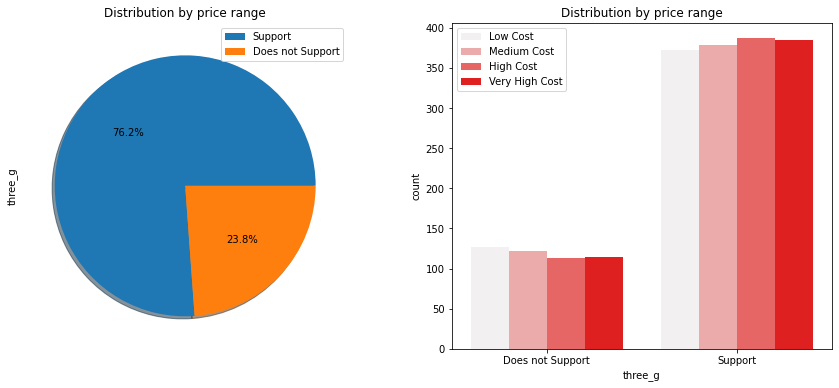

In [30]:
# Chart - 6 visualization code
# Plot of binary features against price range

for col in binary_features:
    fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (15, 6))

    df_train[col].value_counts().plot.pie (autopct='%1.1f%%', ax = ax1, shadow=True, labeldistance=None)
    ax1.set_title('Distribution by price range')
    ax1.legend(['Support', 'Does not Support'])
    sns.countplot(x = col, hue = 'price_range', data = df_train, ax = ax2, color = 'red')
    ax2.set_title('Distribution by price range')
    ax2.set_xlabel(col)
    ax2.legend(['Low Cost', 'Medium Cost', 'High Cost', 'Very High Cost'])
    ax2.set_xticklabels(['Does not Support', 'Support'])

**Battery_power vs price_range**

<AxesSubplot:xlabel='price_range', ylabel='battery_power'>

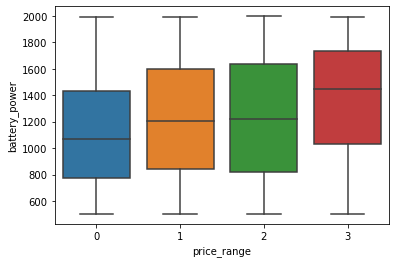

In [31]:
sns.boxplot(x="price_range", y="battery_power", data=df_train)

**No of Phones vs Camera megapixels of front and primary camera**

Text(0.5, 0, 'MegaPixels')

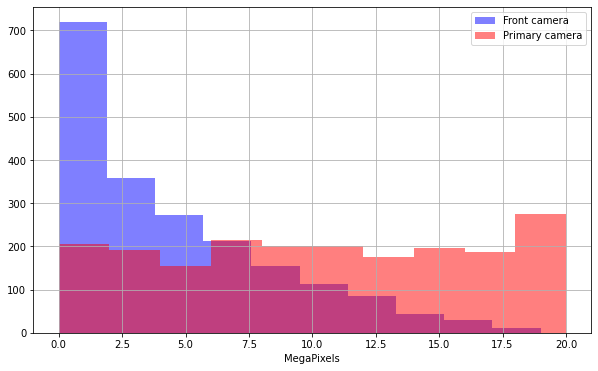

In [32]:
# Chart - 8 visualization code
plt.figure(figsize=(10,6))
df_train['fc'].hist(alpha=0.5,color='blue',label='Front camera')
df_train['pc'].hist(alpha=0.5,color='red',label='Primary camera')
plt.legend()
plt.xlabel('MegaPixels')

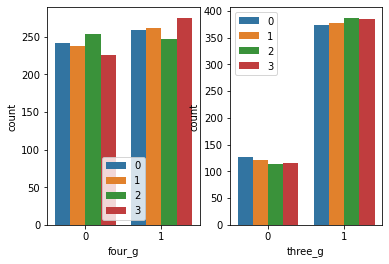

In [33]:
plt.figure(1)
plt.subplot(121)
sns.countplot(x = 'four_g',hue= 'price_range',data  = df_train)
plt.legend()
plt.subplot(122)
sns.countplot(x = 'three_g',hue= 'price_range',data  = df_train)
plt.legend()

In [34]:
#checking the co_relation of dataset
corr = df_train.corr()
corr

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,...,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,...,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,...,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,...,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,...,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,...,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,...,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,...,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,...,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,...,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


In [35]:
def outlinefree(dataCol):     
      
    sorted(dataCol)                          # sort column
    Q1,Q3 = np.percentile(dataCol,[25,75])   # getting 25% and 75% percentile
    IQR = Q3-Q1                              # getting IQR 
    LowerRange = Q1-(1.5 * IQR)              # getting Lowrange
    UpperRange = Q3+(1.5 * IQR)              # getting Upperrange 
    
    colname = dataCol.tolist()               # convert column into list  
    newlist =[]                              # empty list for store new values
    for i in range(len(colname)):
        
        if colname[i] > UpperRange:          # list number > Upperrange 
            colname[i] = UpperRange          # then number = Upperrange
            newlist.append(colname[i])       # append value to empty list
        elif colname[i] < LowerRange:        # list number < Lowrange 
            colname[i] = LowerRange          # then number = Lowrange
            newlist.append(colname[i])       # append value to empty list 
        else:
            colname[i]                       # list number
            newlist.append(colname[i])       # append value to empty list
            
        

    return newlist

In [36]:
for i in range(len(data_num.columns)):
    new_list =  outlinefree(df_train.loc[:,data_num.columns[i]]) 
    df_train.loc[:,data_num.columns[i]] = new_list    

In [37]:
data_final_num = df_train[['battery_power',  'clock_speed' , 'fc','int_memory','m_dep', 'mobile_wt','n_cores', 'pc',
                      'px_height','px_width','ram', 'sc_h', 'sc_w', 'talk_time']]

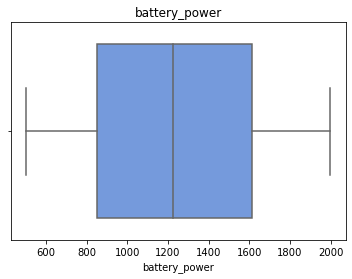

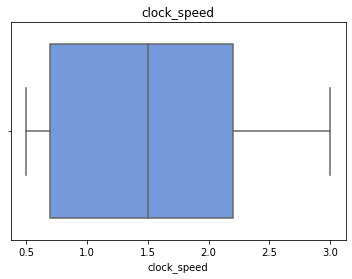

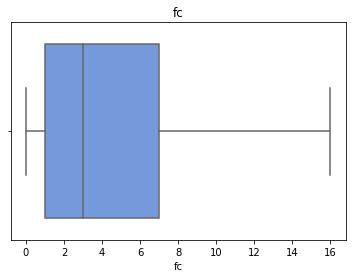

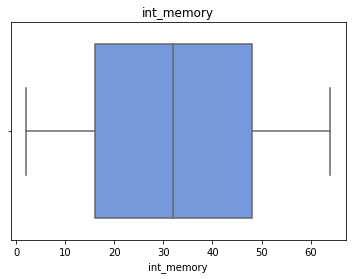

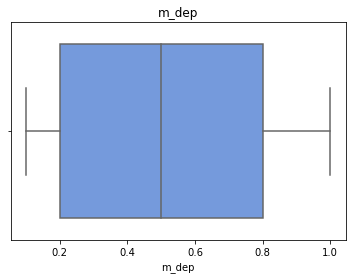

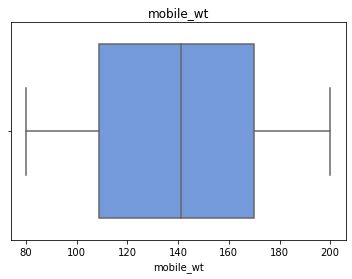

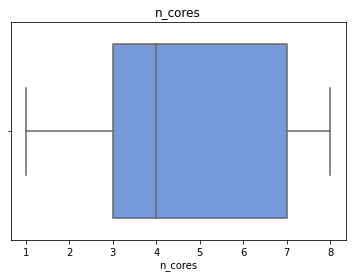

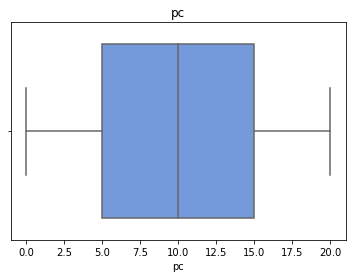

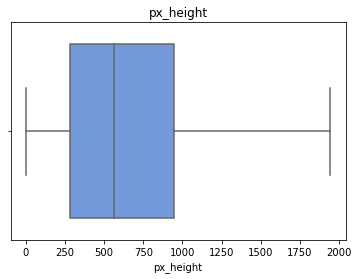

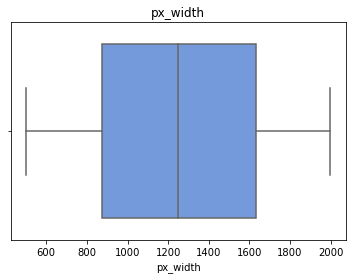

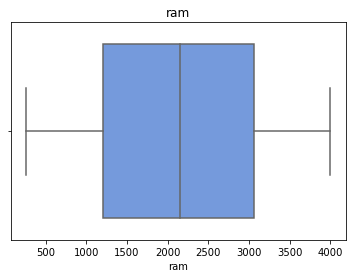

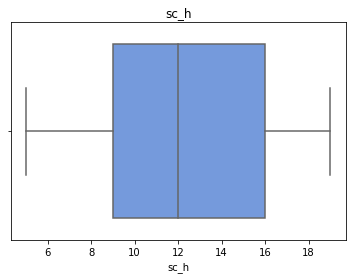

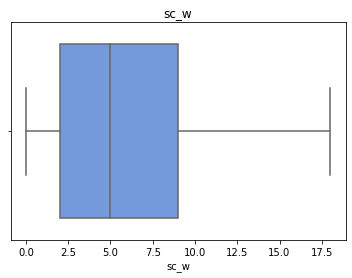

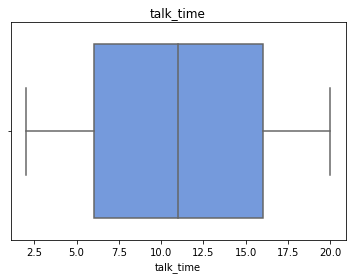

In [38]:
for i in data_final_num.columns:
    sns.boxplot(data_final_num[i],color='#6495ED')
    plt.title(i)
    plt.show()

#### Correlation Heatmap

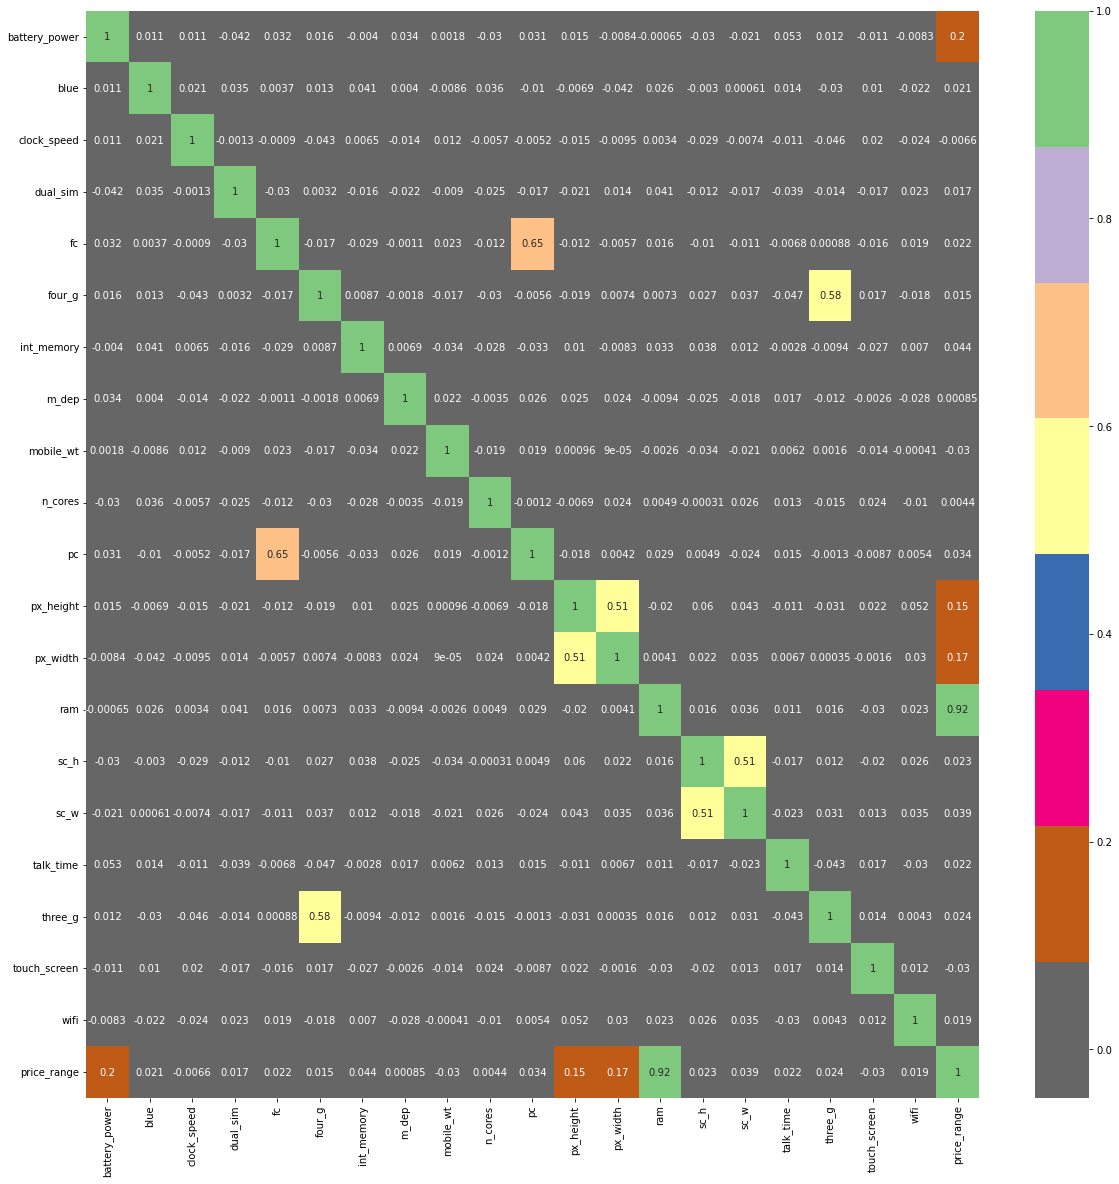

In [39]:
# Correlation Heatmap visualization code
plt.figure(figsize=(20,20))
sns.heatmap(df_train.corr(),annot=True,cmap=plt.cm.Accent_r)
plt.show()

#### Output of EDA According to business point of view 

Here are a few strategies you can choose from when determining your prices:

1.Price based on value. ...

2.Price based on perception. ...

3.Price with the trend. ...

4.Know how to raise or lower prices. ...

5.Use the high-low strategy to attract customers. ...

### ***Hurrah! We have successfully completed our EDA For the Project !!!***

### Feature Selection

In [40]:
df_train.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

#### From Above correlation Heatmap We came to know that All the Independent Features are not Have Much impact in predicting in price range so we choose only few Features for Our Model Implementation. 
#### From Above Heatmap We Conclude that All the independent features is not responsible for Classification of Mobile Price Range, so we will choose only those features which are correlated and according to our Analysis the Modt important features are 
{'battery_power','fc','four_g','int_memory','mobile_wt','pc','ram','sc_h','sc_w','three_g','touch_screen'}

# **Now start wih Machine Learning algorithim**

In [41]:
#importing all libraries
from sklearn.metrics import confusion_matrix ,classification_report,precision_score, recall_score ,f1_score, roc_auc_score,accuracy_score 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier



In [42]:
df_train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1.0,0,7,0.6,188,2,...,20.0,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0.0,1,53,0.7,136,3,...,905.0,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2.0,1,41,0.9,145,5,...,1263.0,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0.0,0,10,0.8,131,6,...,1216.0,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13.0,1,44,0.6,141,2,...,1208.0,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0.0,1,2,0.8,106,6,...,1222.0,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0.0,0,39,0.2,187,4,...,915.0,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1.0,1,36,0.7,108,8,...,868.0,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4.0,1,46,0.1,145,5,...,336.0,670,869,18,10,19,1,1,1,0


In [43]:
# Defining X and y
# Take only those columns as Feature for model Training having highest correlation With Dependent Variables
x=df_train[['battery_power','fc','four_g','int_memory','mobile_wt','pc','ram','sc_h','sc_w','three_g','touch_screen']].values
y = df_train['price_range'].values

In [44]:
# x.shape
x

array([[8.420e+02, 1.000e+00, 0.000e+00, ..., 7.000e+00, 0.000e+00,
        0.000e+00],
       [1.021e+03, 0.000e+00, 1.000e+00, ..., 3.000e+00, 1.000e+00,
        1.000e+00],
       [5.630e+02, 2.000e+00, 1.000e+00, ..., 2.000e+00, 1.000e+00,
        1.000e+00],
       ...,
       [1.911e+03, 1.000e+00, 1.000e+00, ..., 1.000e+00, 1.000e+00,
        1.000e+00],
       [1.512e+03, 4.000e+00, 1.000e+00, ..., 1.000e+01, 1.000e+00,
        1.000e+00],
       [5.100e+02, 5.000e+00, 1.000e+00, ..., 4.000e+00, 1.000e+00,
        1.000e+00]])

In [45]:
y.shape


(2000,)

We do not perform scaling as Decision tree and ensemble techniques doesnot require scaling of data.


# **spliting training and testing data**

In [46]:
#separate the dataset in two type one trainingis 75% of data and other testing is 25% of data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size= 0.25, random_state=167)
print(x_train.shape)
print(x_test.shape)

(1500, 11)
(500, 11)


In [47]:
#Applying Decision Tree
DTmodel=  DecisionTreeClassifier(max_depth=6)  
DTmodel.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=6)

In [48]:
trainscore =  DTmodel.score(x_train,y_train)
testscore =  DTmodel.score(x_test,y_test)
y_predDT =  DTmodel.predict(x_test)

print("train score: {}".format(trainscore),'\n')
print("test score: {} ".format(testscore),'\n')
print(' f1 score: ',f1_score(y_test, y_predDT,average='micro'),'\n')
print(confusion_matrix(y_test, y_predDT))

train score: 0.8733333333333333 

test score: 0.802  

 f1 score:  0.802 

[[118  14   0   0]
 [ 10  89  10   0]
 [  0  19  80  20]
 [  0   1  25 114]]


In [49]:
print(' precision score: ',precision_score(y_test, y_predDT,average='micro'),'\n')
print(' recall score: ',recall_score(y_test, y_predDT,average='micro'),'\n')
print(classification_report(y_test, y_predDT))

 precision score:  0.802 

 recall score:  0.802 

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       132
           1       0.72      0.82      0.77       109
           2       0.70      0.67      0.68       119
           3       0.85      0.81      0.83       140

    accuracy                           0.80       500
   macro avg       0.80      0.80      0.80       500
weighted avg       0.80      0.80      0.80       500



In [50]:
#-------------------------------------- Decision Tree -------------------------------------
probabilityValues = DTmodel.predict_proba(x)
auc = roc_auc_score(y,probabilityValues,multi_class ='ovr')
print(auc)

0.9678375000000001


In [51]:
# Cross validation
from sklearn.model_selection import GridSearchCV
gridDT = GridSearchCV(DTmodel, param_grid = {'max_depth': (5, 30), 'max_leaf_nodes': (10, 100)}, scoring = 'accuracy', cv = 5, verbose = 24)
gridDT.fit(x_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5; 1/4] START max_depth=5, max_leaf_nodes=10..............................
[CV 1/5; 1/4] END max_depth=5, max_leaf_nodes=10;, score=0.743 total time=   0.0s
[CV 2/5; 1/4] START max_depth=5, max_leaf_nodes=10..............................
[CV 2/5; 1/4] END max_depth=5, max_leaf_nodes=10;, score=0.817 total time=   0.0s
[CV 3/5; 1/4] START max_depth=5, max_leaf_nodes=10..............................
[CV 3/5; 1/4] END max_depth=5, max_leaf_nodes=10;, score=0.823 total time=   0.0s
[CV 4/5; 1/4] START max_depth=5, max_leaf_nodes=10..............................
[CV 4/5; 1/4] END max_depth=5, max_leaf_nodes=10;, score=0.783 total time=   0.0s
[CV 5/5; 1/4] START max_depth=5, max_leaf_nodes=10..............................
[CV 5/5; 1/4] END max_depth=5, max_leaf_nodes=10;, score=0.787 total time=   0.0s
[CV 1/5; 2/4] START max_depth=5, max_leaf_nodes=100.............................
[CV 1/5; 2/4] END max_depth=5, max_leaf_node

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(max_depth=6),
             param_grid={'max_depth': (5, 30), 'max_leaf_nodes': (10, 100)},
             scoring='accuracy', verbose=24)

In [52]:
#find best params value
gridDT.best_params_

{'max_depth': 5, 'max_leaf_nodes': 100}

In [53]:
#find best estimeter
gridDT.best_estimator_

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=100)

In [54]:
DTgmodel=DecisionTreeClassifier(max_depth=5, max_leaf_nodes=100)
DTgmodel.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=100)

In [55]:
# Predict on the model
# Get the predicted probabilities
trainscore =  DTgmodel.score(x_train,y_train)
testscore =  DTgmodel.score(x_test,y_test) 
print("train score: {}".format(trainscore),'\n')
print("test score: {}".format(testscore),'\n')
y_predgDT = DTgmodel.predict(x_test)
print(' f1 score: ',f1_score(y_test, y_predgDT,average='micro'),'\n')

# Get the confusion matrix for both train and test
print(confusion_matrix(y_test, y_predgDT))

train score: 0.8466666666666667 

test score: 0.802 

 f1 score:  0.802 

[[121  11   0   0]
 [ 10  82  17   0]
 [  0  17  84  18]
 [  0   0  26 114]]


In [56]:
# Prediction
y_pred_test = DTgmodel.predict(x_test)
y_pres_train = DTgmodel.predict(x_train)

# Evaluation metrics for test
print(' precision score: ',precision_score(y_test, y_predgDT,average='micro'),'\n')
print(' recall score: ',recall_score(y_test, y_predgDT,average='micro'),'\n')
print(classification_report(y_test, y_pred_test))


 precision score:  0.802 

 recall score:  0.802 

              precision    recall  f1-score   support

           0       0.92      0.92      0.92       132
           1       0.75      0.75      0.75       109
           2       0.66      0.71      0.68       119
           3       0.86      0.81      0.84       140

    accuracy                           0.80       500
   macro avg       0.80      0.80      0.80       500
weighted avg       0.81      0.80      0.80       500



In [57]:
x_test[1]

array([1.276e+03, 2.000e+00, 0.000e+00, 5.300e+01, 1.300e+02, 3.000e+00,
       3.798e+03, 1.900e+01, 1.000e+01, 1.000e+00, 1.000e+00])

In [58]:
df_train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1.0,0,7,0.6,188,2,...,20.0,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0.0,1,53,0.7,136,3,...,905.0,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2.0,1,41,0.9,145,5,...,1263.0,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0.0,0,10,0.8,131,6,...,1216.0,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13.0,1,44,0.6,141,2,...,1208.0,1212,1411,8,2,15,1,1,0,1


In [59]:
inputs=[[2000,10,1,64,150,15,2500,9,7,1,1]]
DTgmodel.predict(inputs)[0]

3

In [60]:
#-------------------------------------- Decision Tree -------------------------------------
probabilityValues = DTmodel.predict_proba(x)
auc = roc_auc_score(y,probabilityValues,multi_class ='ovr')
print(auc)

0.9678375000000001


*Finally we made it!!!*

#### Results of EDA:

*1. From EDA we can see that here are mobile phones in 4 price ranges. The number of elements is almost similar.*

*2. half the devices have Bluetooth, and half don’t*

*3. there is a gradual increase in battery as the price range increases*

*4. Ram has continuous increase with price range while moving from Low cost to Very high cost.*

*5. costly phones are lighter.*

*6. RAM, battery power, pixels played more significant role in deciding the price range of mobile phone.*



In [62]:
# Save the model as .pkl file
# import pickle
# pickle.dump(DTgmodel,open('Mobile_Price_Classsification_model.pkl','wb'))


#### What is Pickle used for?? 
Pickle is a Python module used for serializing and deserializing Python objects. Serialization is the process of converting a Python object into a byte stream, which can then be stored in a file or transmitted over a network. Deserialization is the reverse process, where the byte stream is converted back into a Python object. Pickle allows you to save Python objects to disk and load them back into memory later, preserving their state and structure. It's commonly used for saving and loading machine learning models, caching objects, and storing configuration data.





